In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## MPG datasets

In [2]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## countplot() vs. catplot()

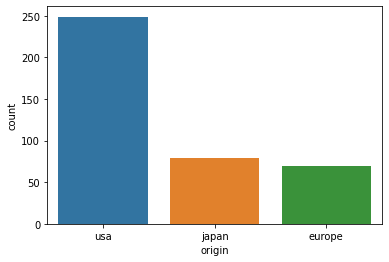

In [3]:
# countplot()
sns.countplot(x='origin', data=mpg)
plt.show()

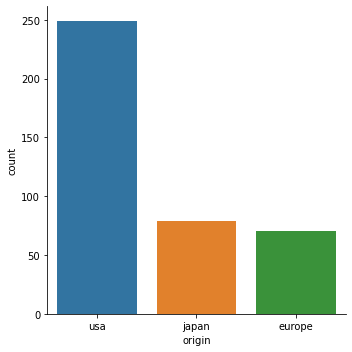

In [4]:
# catplot()
sns.catplot(x='origin', data=mpg, kind='count')
plt.show()

## Changing the order

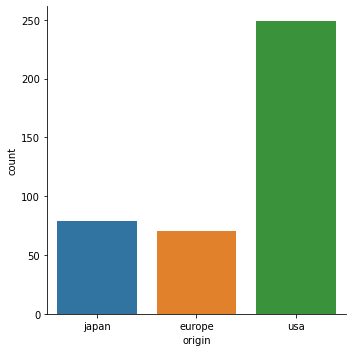

In [5]:
category_order = ['japan', 'europe', 'usa']

sns.catplot(x='origin', data=mpg, kind='count', 
            order=category_order)
plt.show()

## Bar plots

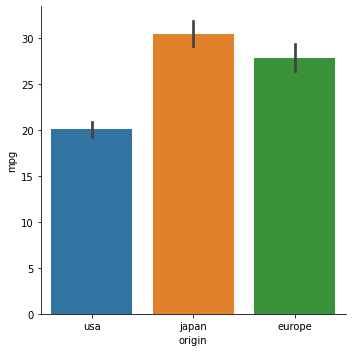

In [6]:
sns.catplot(x='origin', y='mpg', data=mpg, kind='bar')  # bar=mean, line=95% confidence intervals for the mean
plt.show()

## Turning off confidence intervals

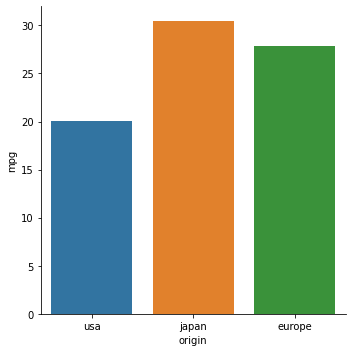

In [7]:
sns.catplot(x='origin', y='mpg', data=mpg, kind='bar', ci=None)
plt.show()

## Changing the orientation

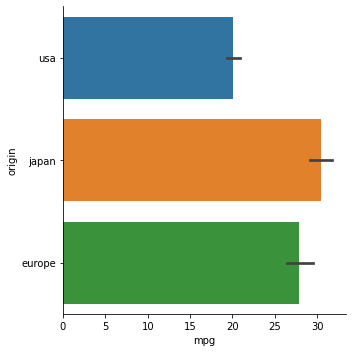

In [8]:
sns.catplot(y='origin', x='mpg', data=mpg, kind='bar')
plt.show()

## Subplots by column

In [9]:
mpg['new?'] = mpg['model_year'] > 75

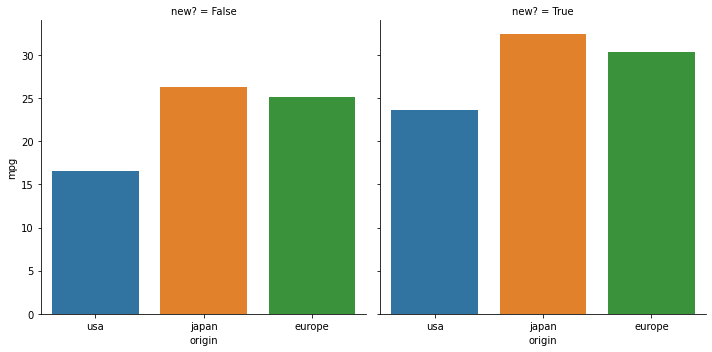

In [10]:
sns.catplot(x='origin', y='mpg', data=mpg, kind='bar', ci=None, col='new?')
plt.show()

## Tips dataset

In [11]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## How to create a box plot

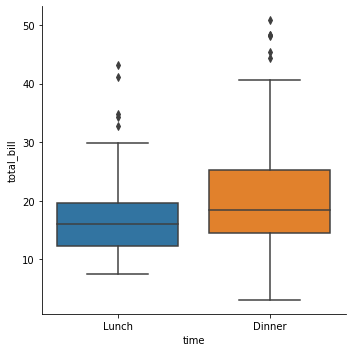

In [12]:
sns.catplot(x='time', y='total_bill', data=tips, kind='box')
plt.show()

## Change the order of categories

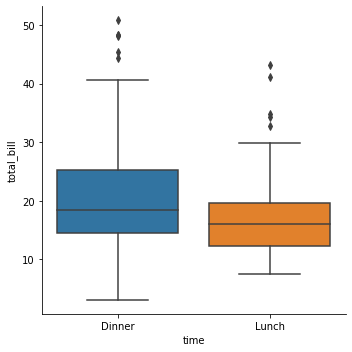

In [13]:
sns.catplot(x='time', y='total_bill', data=tips, kind='box', 
            order=['Dinner', 'Lunch'])
plt.show()

## Omitting the outliers using 'sym'

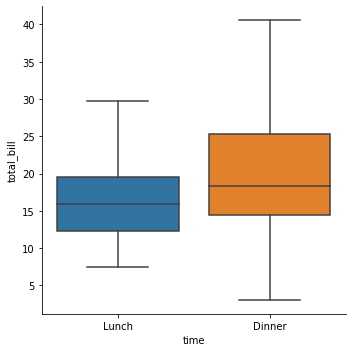

In [14]:
sns.catplot(x='time', y='total_bill', data=tips, kind='box', 
            sym='')
plt.show()

## Changing the whiskers using 'whis'
 - By default, the whiskers extend to 1.5 * the interquartile range
 - Make them extend to 2.0 * IQR: whis=2.0
 - Show the 5th and 95th percentiles: whis=[5, 95]
 - Show min and max values: whis=[0, 100]

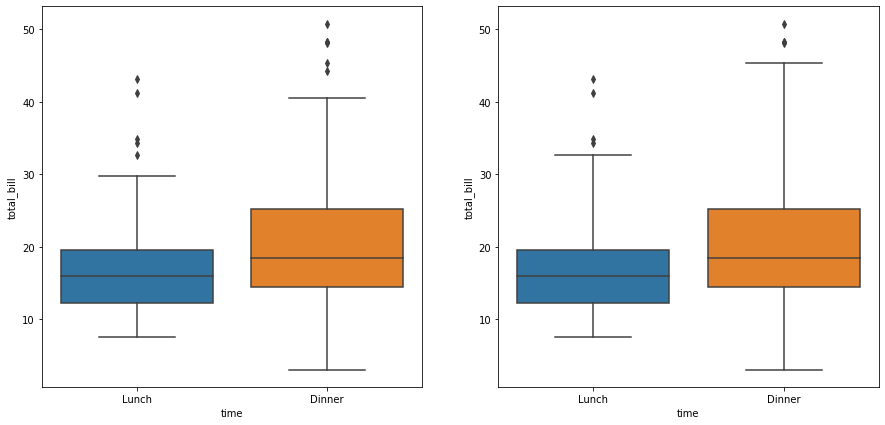

In [15]:
# Make them extend to 2.0 * IQR: whis=2.0

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.boxplot(x='time', y='total_bill', data=tips, ax=ax[0])
sns.boxplot(x='time', y='total_bill', data=tips, ax=ax[1], whis=2.0)

plt.show()

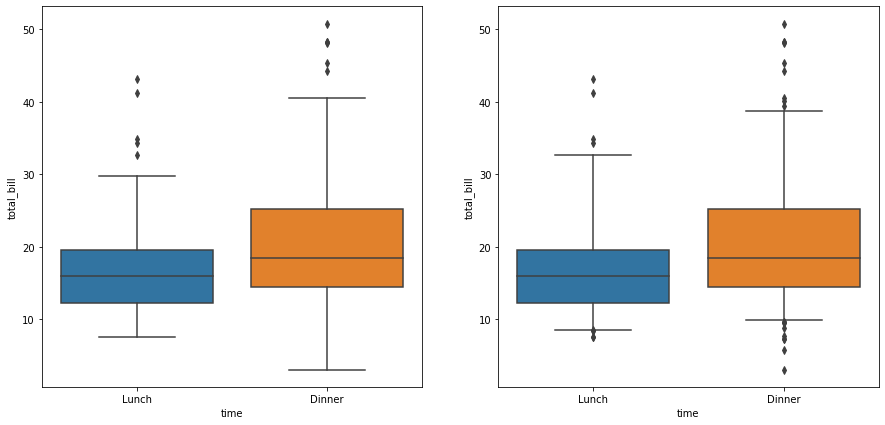

In [16]:
# Show the 5th and 95th percentiles: whis=[5, 95]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.boxplot(x='time', y='total_bill', data=tips, ax=ax[0])
sns.boxplot(x='time', y='total_bill', data=tips, ax=ax[1], whis=[5, 95])

plt.show()

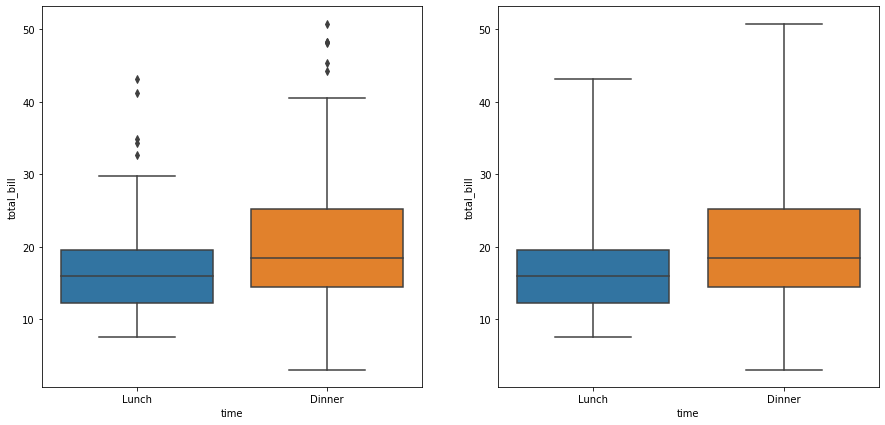

In [17]:
# Show min and max values: whis=[0, 100]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.boxplot(x='time', y='total_bill', data=tips, ax=ax[0])
sns.boxplot(x='time', y='total_bill', data=tips, ax=ax[1], whis=[0, 100])

plt.show()

## Subgroups by smoker

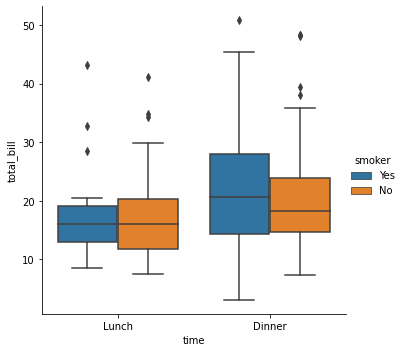

In [18]:
sns.catplot(x='time', y='total_bill', data=tips, kind='box', hue='smoker')
plt.show()

## What are point plots?
 - Points show mean of quantitative variable
 - Vertical lines show 95% con

## Point plots vs. line plots
#### Both show:
 - Mean of quantitative variable
 - 95% conintervals for the mean
 
#### Differences:
 - Line plot has <b>quantitative</b> variable (i.g. time) on x-axis
 - Point plot has <b>categorical</b> varlable on x-axis

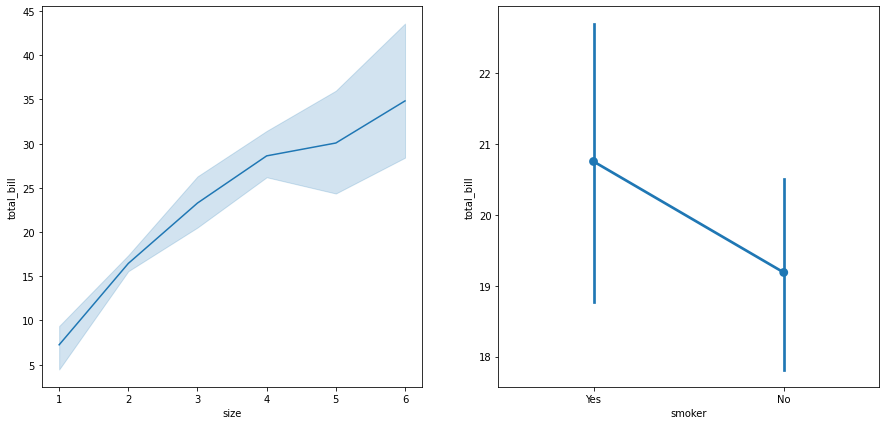

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.lineplot(x='size', y='total_bill', data=tips, ax=ax[0])
sns.pointplot(x='smoker', y='total_bill', data=tips, ax=ax[1])

plt.show()

## Point plots vs. bar plots
#### Both show:
 - Mean of quantitative variable
 - 95% confidence intervals for the mean

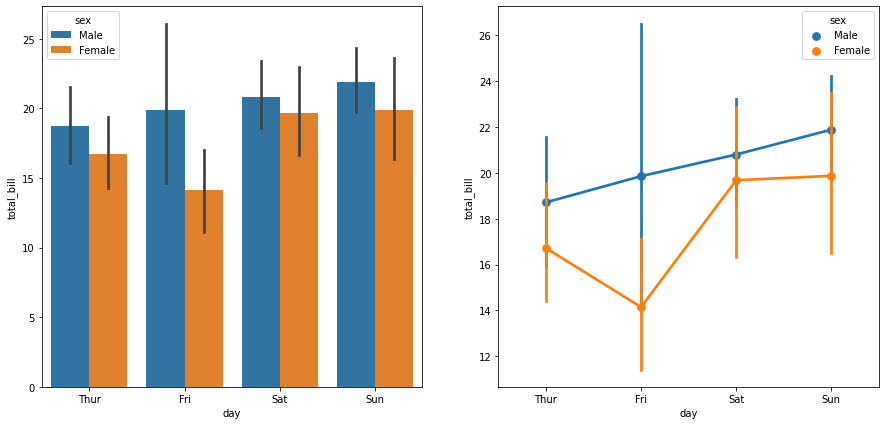

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.barplot(x='day', y='total_bill', data=tips, hue='sex', ax=ax[0])
sns.pointplot(x='day', y='total_bill', data=tips, hue='sex', ax=ax[1])

plt.show()

## Create a point plot

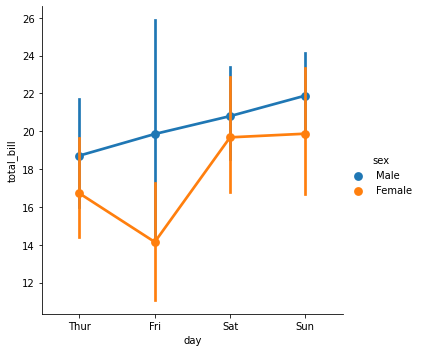

In [21]:
sns.catplot(x='day', y='total_bill', data=tips, hue='sex', kind='point')
plt.show()

## Disconnecting the points

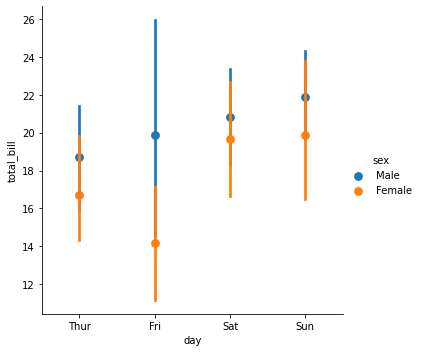

In [22]:
sns.catplot(x='day', y='total_bill', data=tips, hue='sex', kind='point', 
            join=False)
plt.show()

## Displaying the median

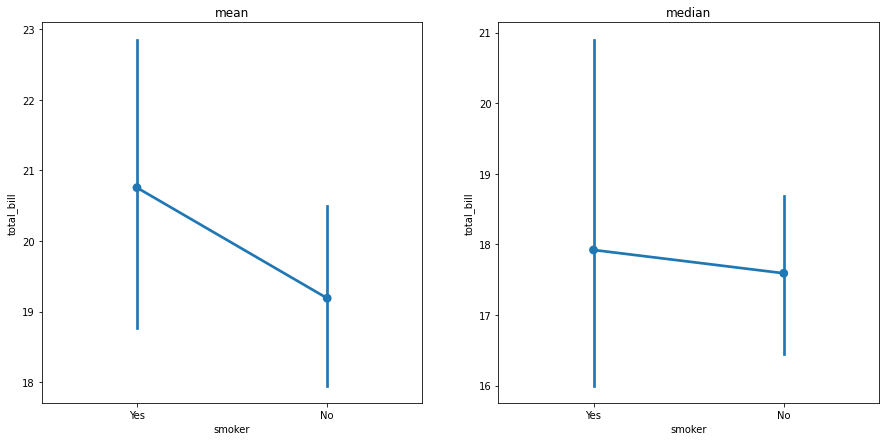

In [23]:
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.pointplot(x='smoker', y='total_bill', data=tips, ax=ax[0])
ax[0].set_title('mean')
sns.pointplot(x='smoker', y='total_bill', data=tips, estimator=np.median, ax=ax[1])
ax[1].set_title('median')

plt.show()

## Customizing the confidence intervals

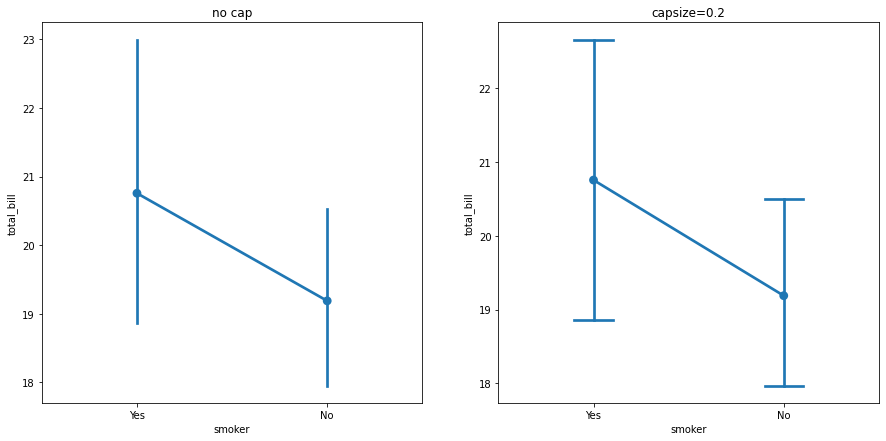

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.pointplot(x='smoker', y='total_bill', data=tips, ax=ax[0])
ax[0].set_title('no cap')
sns.pointplot(x='smoker', y='total_bill', data=tips, capsize=0.2, ax=ax[1])
ax[1].set_title('capsize=0.2')

plt.show()

## Turning off confidence intervals

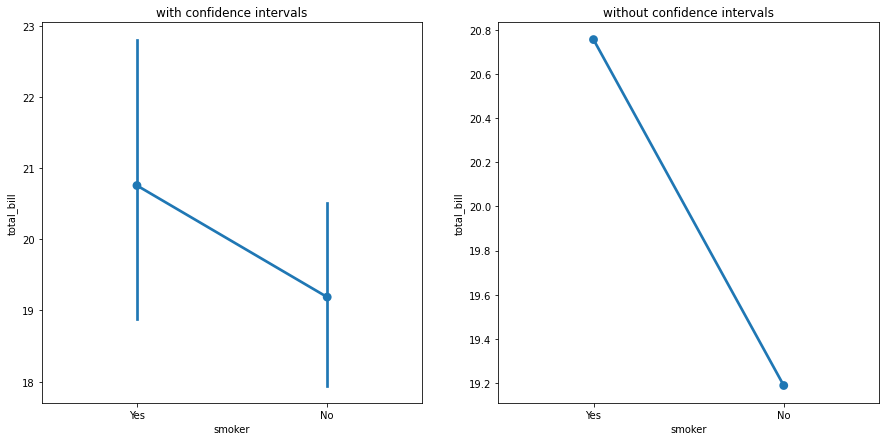

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.pointplot(x='smoker', y='total_bill', data=tips, ax=ax[0])
ax[0].set_title('with confidence intervals')
sns.pointplot(x='smoker', y='total_bill', data=tips, ci=None, ax=ax[1])
ax[1].set_title('without confidence intervals')

plt.show()